In [17]:
!pip install pandas
import pandas as pd
import numpy as np

# AR Model

In [18]:
carbon_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Carbon%20Price.csv'
carbon_price = pd.read_csv(carbon_price_url, header=0)
carbon_price['Date'] = pd.to_datetime(carbon_price['Date'])

In [19]:
carbon_price = carbon_price.replace([np.inf, -np.inf], np.nan)
carbon_price.dropna(subset=['Carbon'], inplace=True)

### AR(1) Model

In [20]:
from statsmodels.tsa.ar_model import AutoReg

y = carbon_price['Carbon']

modelAR1 = AutoReg(y, lags=1)
resultAR1 = modelAR1.fit()

print(resultAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  794
Model:                     AutoReg(1)   Log Likelihood               -1691.983
Method:               Conditional MLE   S.D. of innovations              2.044
Date:                Tue, 26 Mar 2024   AIC                              1.437
Time:                        08:41:38   BIC                              1.455
Sample:                             1   HQIC                             1.444
                                  794                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2809      0.332      0.846      0.397      -0.370       0.932
Carbon.L1      0.9956      0.004    224.563      0.000       0.987       1.004
                                    Roots           

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


### Unit Root Test

In [21]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(y)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.864804
p-value: 0.799342
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### Differencing

In [22]:
y_diff = y.diff().dropna()


modelAR1_diff = AutoReg(y_diff, lags=1)
resultAR1_diff = modelAR1_diff.fit()

print(resultAR1_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  793
Model:                     AutoReg(1)   Log Likelihood               -1689.551
Method:               Conditional MLE   S.D. of innovations              2.043
Date:                Tue, 26 Mar 2024   AIC                              1.436
Time:                        08:41:46   BIC                              1.454
Sample:                             1   HQIC                             1.443
                                  793                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0403      0.073     -0.555      0.579      -0.183       0.102
Carbon.L1     -0.0566      0.035     -1.595      0.111      -0.126       0.013
                                    Roots           

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [23]:
y_diff = y.diff().dropna()

adf_result_diff = adfuller(y_diff)

print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.173512
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### AR(2) Model

In [66]:
modelAR2 = AutoReg(y, lags=2)
resultAR2 = modelAR2.fit()

print(resultAR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  794
Model:                     AutoReg(2)   Log Likelihood               -1689.191
Method:               Conditional MLE   S.D. of innovations              2.042
Date:                Tue, 26 Mar 2024   AIC                              1.438
Time:                        09:49:20   BIC                              1.461
Sample:                             2   HQIC                             1.447
                                  794                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2357      0.333      0.707      0.479      -0.417       0.889
Carbon.L1      0.9424      0.035     26.559      0.000       0.873       1.012
Carbon.L2      0.0538      0.036      1.511      0.1

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


# ARIMA Model

In [53]:
carbon_price_copy = pd.read_csv(carbon_price_url, header=0)
carbon_price_copy['Date'] = pd.to_datetime(carbon_price['Date'])

energy_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Energy.csv'
energy_price = pd.read_csv(energy_price_url, header=0)
energy_price['Date'] = pd.to_datetime(energy_price['Date'])

# Perform the merges
merged_df = pd.merge(carbon_price_copy, energy_price, on='Date', how='inner')

In [54]:
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
merged_df.dropna(subset=['Carbon'], inplace=True)
merged_df.dropna(subset=['Coal'], inplace=True)
merged_df.dropna(subset=['Crude Oil'], inplace=True)
merged_df.dropna(subset=['Natural Gas'], inplace=True)

In [55]:
from statsmodels.tsa.arima.model import ARIMA

X = merged_df[['Coal', 'Crude Oil', 'Natural Gas']]
_y = merged_df['Carbon']

### ARIMA(0,0,0)

In [58]:
model_arima000 = ARIMA(_y, exog=X, order=(0,0,0))
model_arima000_fit = model_arima000.fit()

print(model_arima000_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                          ARIMA   Log Likelihood               -3036.552
Date:                Tue, 26 Mar 2024   AIC                           6083.104
Time:                        09:26:36   BIC                           6106.342
Sample:                             0   HQIC                          6092.046
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.9801      3.917     -2.292      0.022     -16.658      -1.302
Coal           -0.1496      0.021     -7.177      0.000      -0.190      -0.109
Crude Oil       1.1761      0.070     16.904    

### ARIMA(1,0,0)

In [59]:
model_arima100 = ARIMA(_y, exog=X, order=(1,0,0))
model_arima100_fit = model_arima100.fit()

print(model_arima100_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1651.890
Date:                Tue, 26 Mar 2024   AIC                           3315.780
Time:                        09:27:34   BIC                           3343.666
Sample:                             0   HQIC                          3326.511
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.2167     63.353     -0.114      0.909    -131.387     116.954
Coal           -0.0063      0.005     -1.242      0.214      -0.016       0.004
Crude Oil       0.0532      0.031      1.722    

### ARIMA(0,1,0)

In [60]:
model_arima010 = ARIMA(_y, exog=X, order=(0,1,0))
model_arima010_fit = model_arima010.fit()

print(model_arima010_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1646.482
Date:                Tue, 26 Mar 2024   AIC                           3300.964
Time:                        09:28:02   BIC                           3319.549
Sample:                             0   HQIC                          3308.116
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Coal           -0.0064      0.005     -1.246      0.213      -0.016       0.004
Crude Oil       0.0517      0.031      1.677      0.094      -0.009       0.112
Natural Gas    -0.0074      0.006     -1.225    

### ARIMA(0,0,1)

In [61]:
model_arima001 = ARIMA(_y, exog=X, order=(0,0,1))
model_arima001_fit = model_arima001.fit()

print(model_arima001_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2634.488
Date:                Tue, 26 Mar 2024   AIC                           5280.977
Time:                        09:28:30   BIC                           5308.863
Sample:                             0   HQIC                          5291.708
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6355      3.667      1.264      0.206      -2.552      11.823
Coal           -0.0891      0.017     -5.223      0.000      -0.122      -0.056
Crude Oil       0.9339      0.063     14.939    

### ARIMA(0,1,1)

In [62]:
model_arima011 = ARIMA(_y, exog=X, order=(0,1,1))
model_arima011_fit = model_arima011.fit()

print(model_arima011_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1645.524
Date:                Tue, 26 Mar 2024   AIC                           3301.047
Time:                        09:29:08   BIC                           3324.279
Sample:                             0   HQIC                          3309.988
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Coal           -0.0088      0.005     -1.749      0.080      -0.019       0.001
Crude Oil       0.0510      0.031      1.627      0.104      -0.010       0.112
Natural Gas    -0.0066      0.006     -1.097    

### ARIMA(1,0,1)

In [63]:
model_arima101 = ARIMA(_y, exog=X, order=(1,0,1))
model_arima101_fit = model_arima101.fit()

print(model_arima101_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1650.943
Date:                Tue, 26 Mar 2024   AIC                           3315.886
Time:                        09:29:41   BIC                           3348.420
Sample:                             0   HQIC                          3328.406
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.3711     63.339     -0.116      0.907    -131.512     116.770
Coal           -0.0088      0.005     -1.737      0.082      -0.019       0.001
Crude Oil       0.0524      0.031      1.669    

### ARIMA(1,1,0); theoretical optimal model

In [64]:
model_arima110 = ARIMA(_y, exog=X, order=(1,1,0))
model_arima110_fit = model_arima110.fit()

print(model_arima110_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1645.364
Date:                Tue, 26 Mar 2024   AIC                           3300.728
Time:                        09:30:03   BIC                           3323.960
Sample:                             0   HQIC                          3309.669
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Coal           -0.0092      0.005     -1.857      0.063      -0.019       0.001
Crude Oil       0.0508      0.031      1.623      0.105      -0.011       0.112
Natural Gas    -0.0064      0.006     -1.070    

### ARIMA(1,1,1); best performing model

In [65]:
model_arima111 = ARIMA(_y, exog=X, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Erica Zhao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  771
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1643.865
Date:                Tue, 26 Mar 2024   AIC                           3299.731
Time:                        09:30:13   BIC                           3327.609
Sample:                             0   HQIC                          3310.460
                                - 771                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Coal           -0.0095      0.005     -1.900      0.057      -0.019       0.000
Crude Oil       0.0474      0.031      1.533      0.125      -0.013       0.108
Natural Gas    -0.0067      0.006     -1.109    

<Figure size 720x432 with 0 Axes>

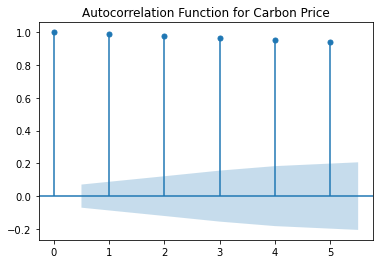

In [68]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(merged_df['Carbon'], lags=5, alpha=0.05)
plt.title('Autocorrelation Function for Carbon Price')
plt.show()

<Figure size 720x432 with 0 Axes>

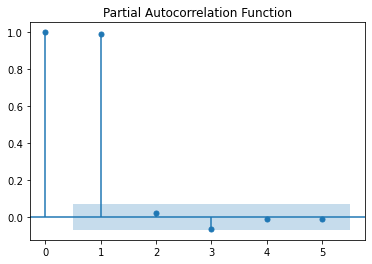

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 6))
plot_pacf(_y, lags=5, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()